# Projeto 1 - Simulação

    Processos Estocásticos: SME-0805 2020.2
	 _______ _______ _______
	|   |   |               \
	|   |   |      \    |___|
	|   |    \      |   |
	|_______ _______|___|

- Luíza Pereira Pinto Machado, Nº USP 7564426
- Marina Fontes Alcântara Machado, Nº USP 10692040
- Matheus Carvalho Raimundo, Nº USP 10369014
- Vitor Avian Santos, Nº USP 10295392


### Bibliotecas e Constantes

Primeiro, vamos importar todas as bibliotecas que usaremos ao longo das simulações. Também vamos definir algumas constantes que serão usadas no código.

In [67]:
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import random
import math

# Definição do número de simulações. Quanto mais simulações, mais lento o código, porém mais próximo do valor real.
N_SIM_START = 1 # Começa em quantas simulações?
N_SIM_END = 1000 # Termina em quantas simulaçoes?
N_SIM_STEP = 10 # Pula de quanto em quanto?

# Matplotlib
FIG_SIZE = (10, 6) # Tamanho para plotar usando a matplotlib.
X_SIM = np.arange(N_SIM_START, N_SIM_END + N_SIM_STEP, N_SIM_STEP, dtype = np.int) # Usado no código (eixo X dos gráficos).
Y_SIM = np.empty([X_SIM.shape[0]], dtype = np.float) # Usado no código (eixo Y a ser preenchido dos gráficos).

# Essa função exibe um gráfico (mostrando os valores simulados e o valor teórico, se tiver).
def exibir(x_points = X_SIM, y_points = Y_SIM, valor_teorico = None, x_lim = None, y_lim = None, sim_label = 'Valor simulado', theo_label = 'Valor teórico', x_label = 'Número de experimentos', y_label = 'Resultado obtido', figsize = FIG_SIZE):
    plt.figure(figsize = figsize)
    ax = plt.axes()
    plt.plot(x_points, y_points, linestyle='-', color = 'blue', linewidth=2, label = sim_label)
    if valor_teorico is not None:
        plt.axhline(y = valor_teorico, color = 'r', linestyle = '--', label = theo_label)
        plt.text(1.01, valor_teorico, '%g' % (valor_teorico), color = 'r', transform = ax.get_yaxis_transform(), bbox = dict(facecolor='w', alpha=0.5), ha = 'left', va = 'center')
    plt.ylabel(y_label, fontsize = 20)
    plt.xlabel(x_label, fontsize = 20)
    if x_lim is None:
        x_lim = [np.amin(x_points), np.amax(x_points)]
    if y_lim is None and valor_teorico is None:
        y_lim = [np.amin(y_points), np.amax(y_points)]
    elif y_lim is None:
        y_lim = [min(np.amin(y_points), valor_teorico), max(np.amax(y_points), valor_teorico)]
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.legend()
    plt.show(True)

### Exercício 1 - A

Esta simulação se refere ao primeiro exercício, letra A. Para cada experimento, a mosca começa na posição indicada no grafo e segue pelas arestas de maneira aleatória até chegar na aranha OU na janela. A escolha da aresta em que ela segue é feita usando a função _random.choice_, o que significa que não há nenhum tipo de peso nas arestas.

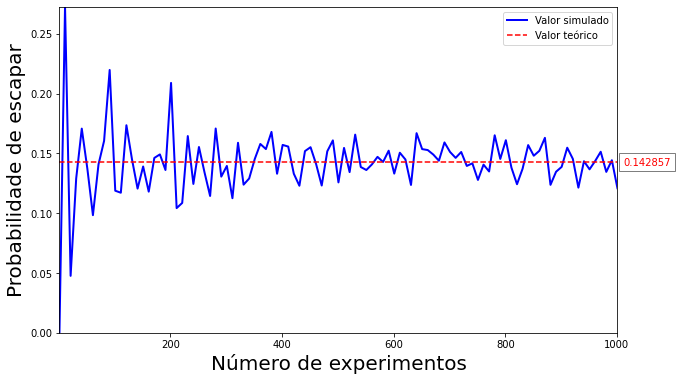

In [68]:
# Definir possíveis movimentos da mosca.
movements = {
    'mesa': ['aranha', 'maca'],
    'maca': ['mesa', 'cadeira'],
    'cadeira': ['aranha', 'maca', 'janela'],
    'aranha': False, # Foi pega pela aranha!
    'janela': True # Fugiu pela janela!
}
start_point = 'mesa'
calculado = 1/7 # Valor calculado na parte escrita do projeto.

for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
    n = X_SIM[i]
    count = 0
    for _ in range(n): # Realizar os N experimentos.
        current = start_point
        while type(movements[current]) == list:
            current = random.choice(movements[current])
        if movements[current] == True:
            count += 1
    Y_SIM[i] = count / n
    
exibir(valor_teorico = calculado, y_label = 'Probabilidade de escapar')

### Exercício 1 - B

Esta simulação se refere ao primeiro exercício, letra B. O código é bem semelhante ao anterior, com a diferença única de que ele faz uma contagem de quantas vezes passou pelos vértices da maça e da cadeira.

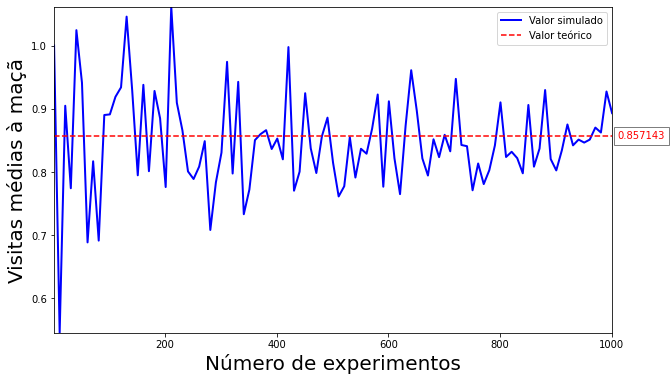

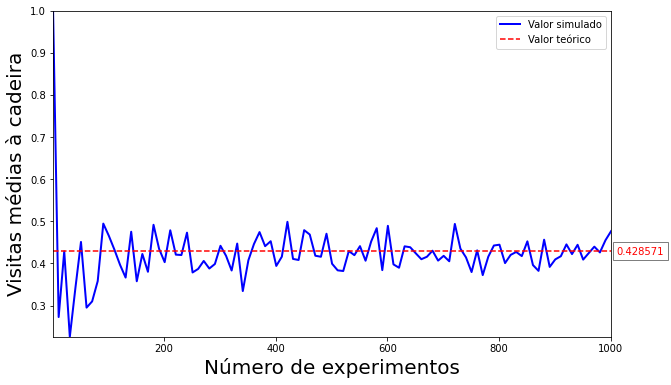

In [69]:
# Valor calculado na parte escrita do projeto.
calculado_maca = 18/21
calculado_cadeira = 6/14

# Alocar.
y_maca = Y_SIM
y_cadeira = np.copy(Y_SIM)

for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
    n = X_SIM[i]
    visitas_maca = 0
    visitas_cadeira = 0
    for _ in range(n): # Realizar os N experimentos.
        current = start_point
        while type(movements[current]) == list:
            if current == 'maca':
                visitas_maca += 1
            if current == 'cadeira':
                visitas_cadeira += 1
            current = random.choice(movements[current])
    y_maca[i] = visitas_maca / n
    y_cadeira[i] = visitas_cadeira / n
    
exibir(valor_teorico = calculado_maca, y_points = y_maca, y_label = 'Visitas médias à maçã')
exibir(valor_teorico = calculado_cadeira, y_points = y_cadeira, y_label = 'Visitas médias à cadeira')

### Exercício 1 - C

Esta simulação se refere ao primeiro exercício, letra C. O código é bem semelhante ao **exercício 1 - A**, com diferença única de que o grafo é modificado para remover a aranha e é contado o número de passos que foram dados.

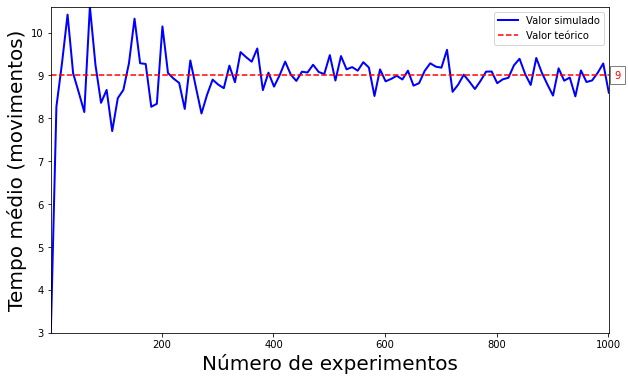

In [70]:
# Redefinir possíveis movimentos da mosca (agora removemos a aranha).
movements = {
    'mesa': ['maca'],
    'maca': ['mesa', 'cadeira'],
    'cadeira': ['maca', 'janela'],
    'janela': True # Fugiu pela janela!
}
start_point = 'mesa'
calculado = 9 # Valor calculado na parte escrita do projeto.

for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
    n = X_SIM[i]
    movement_count = 0
    for _ in range(n): # Realizar os N experimentos.
        current = start_point
        while type(movements[current]) == list:
            movement_count += 1
            current = random.choice(movements[current])
    Y_SIM[i] = movement_count / n
    
exibir(valor_teorico = calculado, y_label = 'Tempo médio (movimentos)')

### Exercício 2 - B

Esta simulação se refere ao segundo item do segundo exercício, que se refere ao calculo da probabilidade de que o jogador A venca a partida com p = 0,49. Inicialmente, seu saldo é R\\$6,00 e o de seu oponente, R\\$10,00, totalizando um montante de R\\$16,00. A cada rodada, os jogadores apostam R\\$2,00 cada e perde aquele que ficar com saldo zerado primeiro.


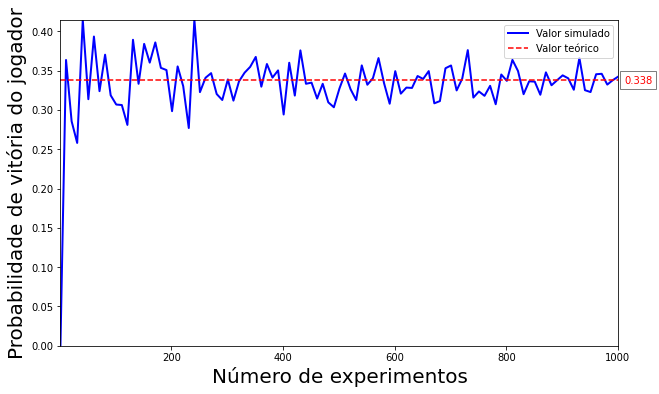

In [71]:
# Alocar.
y_prob = Y_SIM

p = 0.49
saldo_inicial = 6
saldo_total = 16

# Valor calculado na parte escrita do projeto.
calculado = 0.338

for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
    n = X_SIM[i]    
    num_vitorias_jogador = 0
    for _ in range(n): # Realizar os N experimentos.
        saldo = saldo_inicial
        while ((saldo > 0) and (saldo < saldo_total)):
            if(np.random.uniform() <= p):
                saldo = saldo + 2
            else:
                saldo = saldo - 2
        if (saldo == saldo_total):
            num_vitorias_jogador = num_vitorias_jogador + 1
    Y_SIM[i] = num_vitorias_jogador / n
    
exibir(valor_teorico = calculado, y_points = y_prob, y_label = 'Probabilidade de vitória do jogador')

### Exercício 2 - C

Esta simulação se refere ao terceiro item do segundo exercício, que simula partidas com tres jogadores. Foram testadas tres combinacoes de probabilidades de vitoria para cada jogador, assim como tres combinacoes de saldo inicial dos jogadores (e, por consequencia, do saldo total em jogo).


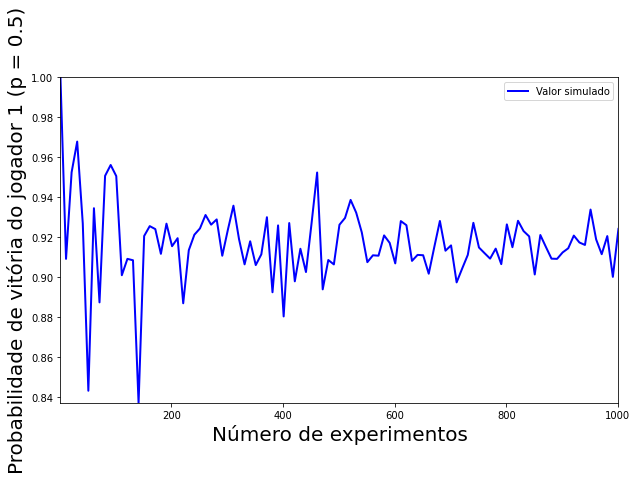

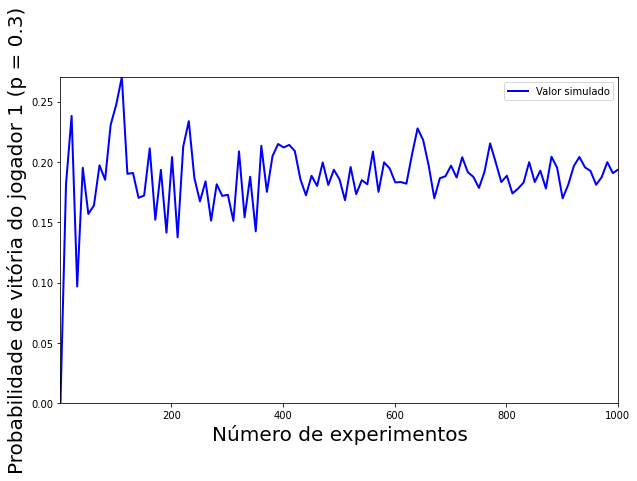

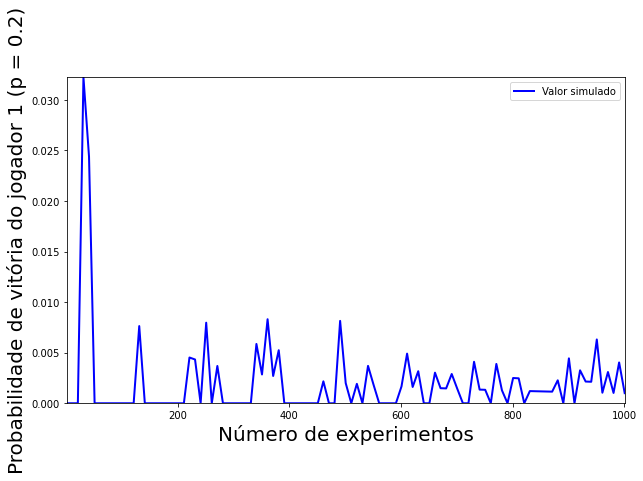

In [74]:
def choose_round_winner(prob_dict):
    options = []
    
    for item, prob in prob_dict.items():
        options += int(prob*1000) * [item]
    
    return random.choice(options)

# Alocar.
y_prob = Y_SIM

money_vec = [[10, 10, 10], [6, 8, 6], [14, 12, 10]]
total_money_vec = [30, 20, 36]
prob_dict_vec = [{'p_A':0.5, 'p_B':0.3, 'p_C':0.2},
             {'p_A':0.3, 'p_B':0.3, 'p_C':0.4},
             {'p_A':0.2, 'p_B':0.4, 'p_C':0.4},] 

for aux in (range(3)):
    for i in range(X_SIM.shape[0]): # Para cada ponto do eixo X...
        n = X_SIM[i]
        vitorias_A = 0

        for _ in range(n): # Realizar os N experimentos
            val_round = 4
            money = money_vec[aux].copy()
            total_money = total_money_vec[aux]
            prob_dict = prob_dict_vec[aux].copy()

            while ((money[0] > 0) and (money[0] < total_money)):
                round_winner = choose_round_winner(prob_dict)
            
                if(round_winner == 'p_A'):
                    money[0] += val_round
                    if (money [1] > 0): money[1] -= 2
                    if (money [2] > 0): money[2] -= 2
                elif (round_winner == 'p_B'):
                    money[1] += val_round
                    if (money [0] > 0): money[0] -= 2
                    if (money [2] > 0): money[2] -= 2
                elif (round_winner == 'p_C'):
                    money[2] += val_round
                    if (money [0] > 0): money[0] -= 2
                    if (money [1] > 0): money[1] -= 2

                if (money[1] == 0 and prob_dict['p_B']): 
                    prob_dict['p_B'] = 0
                    val_round = 2
                if (money[2] == 0 and prob_dict['p_C']):
                    prob_dict['p_C'] = 0
                    val_round = 2

            if (money[0] == total_money):
                vitorias_A = vitorias_A + 1

        Y_SIM[i] = vitorias_A / n

    exibir(y_points = y_prob, y_label = 'Probabilidade de vitória do jogador 1 (p = %g)' % (prob_dict['p_A']))

### Exercicio 3-B

Simulação de lançamento de uma moeda até que aparecam duas caras em sequência.

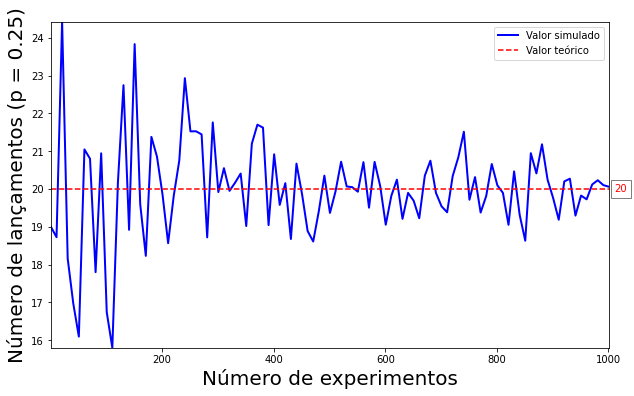

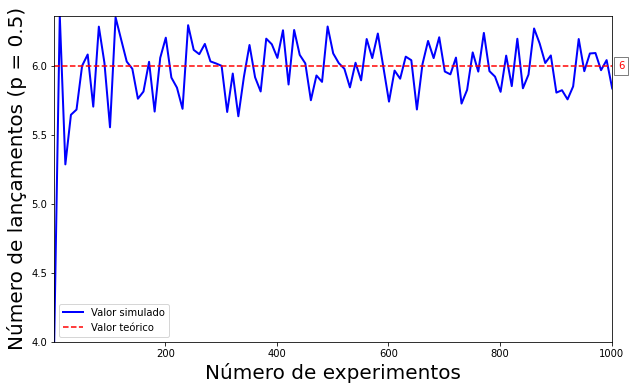

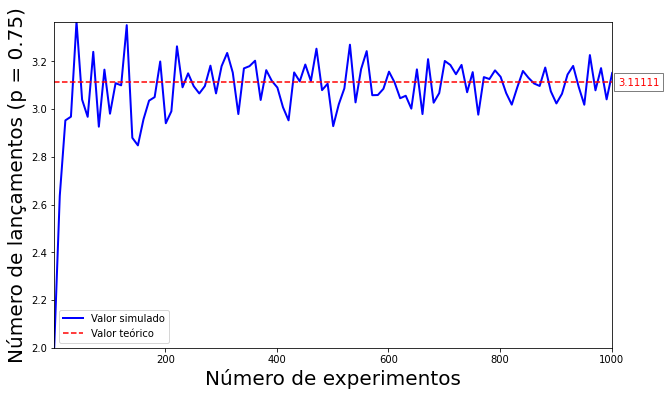

In [73]:
vp = [0.25, 0.5, 0.75]

for p in vp:
    calculado = (p+1)/(p**2)
    for i in range(X_SIM.shape[0]):
        n = X_SIM[i]
        num_lanc = 0
        for _ in range(n):
            num_caras = 0
            while (num_caras < 2):
                num_lanc = num_lanc + 1
                if (np.random.uniform() < p):
                    num_caras = num_caras + 1
                else:
                    num_caras = 0
        Y_SIM[i] = num_lanc / n
    exibir(valor_teorico = calculado, y_points = y_prob, y_label = 'Número de lançamentos (p = %g)' % (p))